<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/Copy_of_LAbwk5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating a DataFrame
air = pd.read_csv('/content/co2.csv')
air

,0
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


In [ ]:
# Renaiming Columns
air.columns = ['CO2']
air

,CO2
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


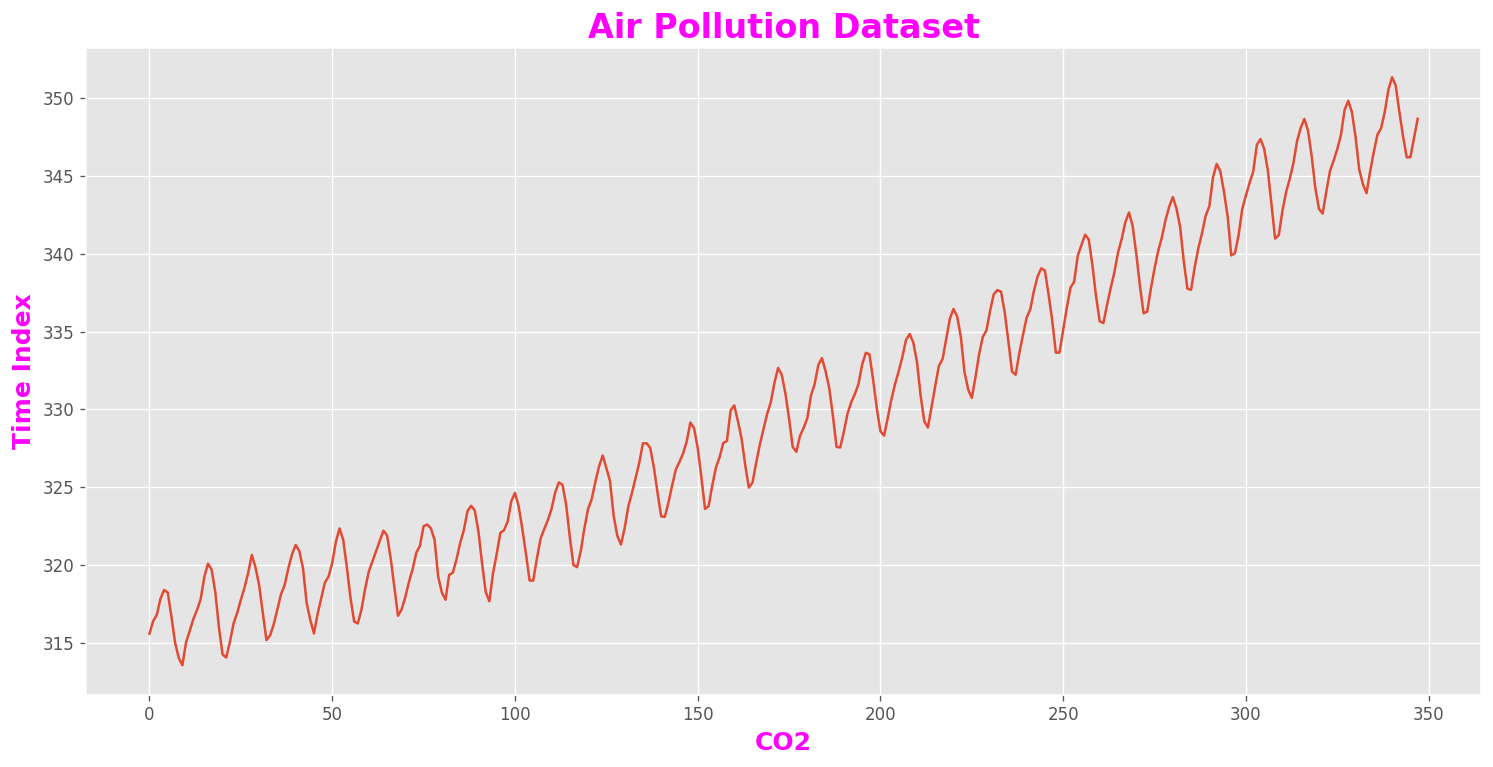

In [ ]:
# Plotting the Air Pollution Dataset
plt.style.use('ggplot')
plt.figure(figsize=(15,7), dpi = 120)
plt.xlabel('CO2', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':15})
plt.ylabel('Time Index', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':15})
plt.title('Air Pollution Dataset', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':20})
plt.plot(air)
plt.show()

In [ ]:
# Running Test To Ascertain that the TS is Stationary or Non-Stationary
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(air)
print('ADF Test: p-value = %f'  % adf_test[1]) # Augmented Dickey Fulller Test (ADF_Test) p-value > 0.05 ======> TS is non-stationary

kpss_test = kpss(air)
print('KPSS Test: p-value = %f'  % kpss_test[1]) # Kwaike-Phillips-Schmidt-Shin KPSS Test (KPSS_Test) p-value < 0.05 ====> TS is non-Stationary

"""
Given these two conditions on the p-values, we can conclude that the TS is non-stationary, therefore, we can make the TS stationary to develop ARIMA models.
AutoRegressive (AR) Integrated (I) Moving Average (MA)
for the AR (p) I(d) MA(q)  ======> ARIMA(p,d,q)
"""

ADF Test: p-value = 1.000000
KPSS Test: p-value = 0.010000


/tmp/ipython-input-278993736.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(air)


'\nGiven these two conditions on the p-values, we can conclude that the TS is non-stationary, therefore, we can make the TS stationary to develop ARIMA models.\nAutoRegressive (AR) Integrated (I) Moving Average (MA)\nfor the AR (p) I(d) MA(q)  ======> ARIMA(p,d,q)\n'

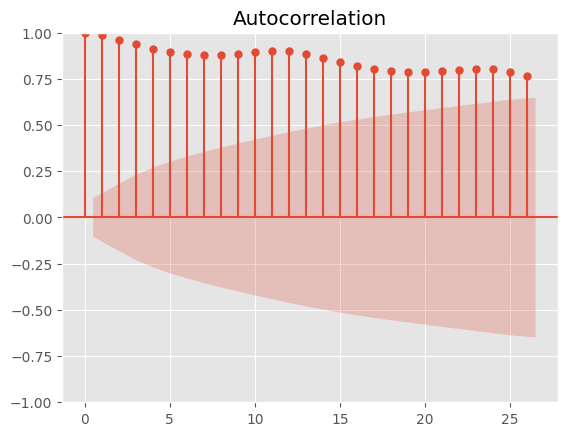

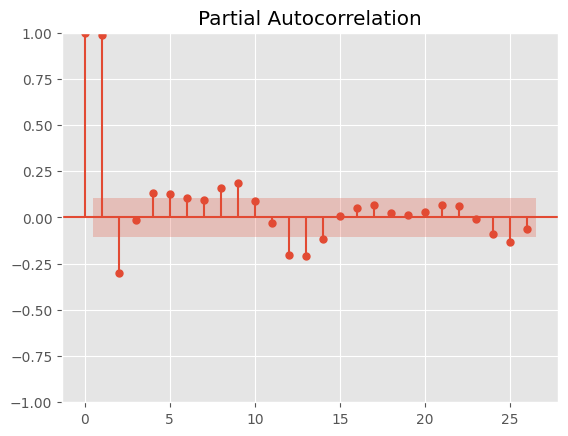

'\nBased on the ACF plot many lags are statistically significant. Therefore q = 0, 1, 2, 3, ..\nBased on the PACF plot many lags are statistically significant. Therefore p = 0, 1, 2, 3, ..\nARIMA(2,d,0) - ARIMA(0,d,2) - ARIMA(1,d,1) - ARIMA(2,d,1)\n\n'

In [ ]:
# Plotting the ACF and PACF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(air), plot_pacf(air)
plt.show()

"""
Based on the ACF plot many lags are statistically significant. Therefore q = 0, 1, 2, 3, ..
Based on the PACF plot many lags are statistically significant. Therefore p = 0, 1, 2, 3, ..
ARIMA(2,d,0) - ARIMA(0,d,2) - ARIMA(1,d,1) - ARIMA(2,d,1)

"""

<Figure size 1800x840 with 0 Axes>

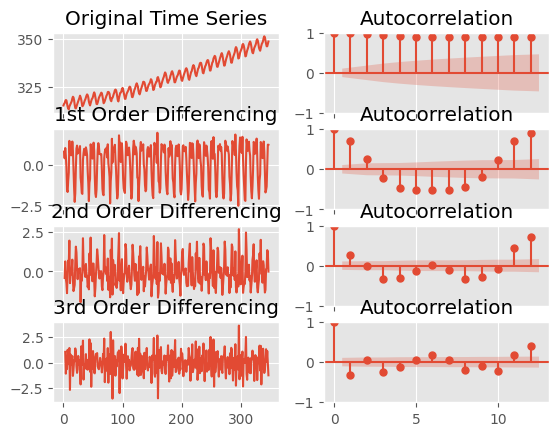

'\nFrom the differencing plots, we can spot that at order 1 the TS is Stationary, therefore d = 1\n\nARIMA(2,1,0) - ARIMA(0,1,2) - ARIMA(1,1,1) - ARIMA(2,1,1), ....\n\n\n\n'

In [ ]:
# Determine the value of d by carrying out Differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original TS
plt.figure(figsize=(15,7), dpi = 120)
fig, axes = plt.subplots(4, 2, sharex= 'col')
axes[0, 0].plot(air); axes[0, 0].set_title('Original Time Series')
plot_acf(air, lags = 12, ax=axes[0, 1])

# Plotting the 1st Order Differencing
axes[1, 0].plot(air.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(air.diff().dropna(), lags = 12, ax=axes[1, 1])

# Plotting 2nd Dofferencing Order
axes[2, 0].plot(air.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(air.diff().diff().dropna(), lags = 12, ax=axes[2, 1])

# Plotting 3rd Differencing Order
axes[3, 0].plot(air.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(air.diff().diff().diff().dropna(), lags = 12, ax=axes[3, 1])

plt.show()

"""
From the differencing plots, we can spot that at order 1 the TS is Stationary, therefore d = 1

ARIMA(2,1,0) - ARIMA(0,1,2) - ARIMA(1,1,1) - ARIMA(2,1,1), ....



"""

In [ ]:
from scipy.stats.distributions import f
# Let's Compare the different ARIMAs
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order = (0,1,0))
model_fit = model.fit()
print(model_fit.summary())

"""
Akaike Information Criterion (AIC): Allows us to find outy whether the model fit the dataset -
It is also used to understand whether the model is good at predicting, meaning that it is good at model unseen dataset

Bayesian Information Criterion (BIC): Allows us to find outy whether the model good at dealing with complexity -
meaning that it is good at model dealing with many variables.

Hannan Quinn Information Criterion (HQIC) is used to select between different models.

NB: for these three metrics, the smaller the better the model.
"""


                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -546.622
Date:                Fri, 16 Jan 2026   AIC                           1095.244
Time:                        09:38:36   BIC                           1099.094
Sample:                             0   HQIC                          1096.777
                                - 348                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.3671      0.163      8.401      0.000       1.048       1.686
Ljung-Box (L1) (Q):                 173.03   Jarque-Bera (JB):                35.77
Prob(Q):                              0.00   Pr

'\nAkaike Information Criterion (AIC): Allows us to find outy whether the model fit the dataset - \nIt is also used to understand whether the model is good at predicting, meaning that it is good at model unseen dataset\n\nBayesian Information Criterion (BIC): Allows us to find outy whether the model good at dealing with complexity - \nmeaning that it is good at model dealing with many variables. \n\nHannan Quinn Information Criterion (HQIC) is used to select between different models. \n\nNB: for these three metrics, the smaller the better the model.\n'

In [ ]:
# CReating 2nd ARIMA model
model = ARIMA(air, order = (0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -442.920
Date:                Fri, 16 Jan 2026   AIC                            889.839
Time:                        09:38:36   BIC                            897.538
Sample:                             0   HQIC                           892.905
                                - 348                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6562      0.044     14.864      0.000       0.570       0.743
sigma2         0.7508      0.075      9.981      0.000       0.603       0.898
Ljung-Box (L1) (Q):                  30.35   Jarque-

In [ ]:
#  Creating the 3rd ARIMA model
model = ARIMA(air, order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -403.784
Date:                Fri, 16 Jan 2026   AIC                            813.568
Time:                        09:38:36   BIC                            825.116
Sample:                             0   HQIC                           818.166
                                - 348                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5730      0.060      9.482      0.000       0.455       0.691
ma.L1          0.3545      0.067      5.287      0.000       0.223       0.486
sigma2         0.5986      0.052     11.436      0.0

In [ ]:
# Creating the 4th ARIMA (2,1,1)

model = ARIMA(air, order = (2,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Based on thgese four models, we can conclude that ARIMA(2,1,1) is bes because of the lowest values of the AIC, BIC, HQIC.

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -335.983
Date:                Fri, 16 Jan 2026   AIC                            679.967
Time:                        09:39:23   BIC                            695.364
Sample:                             0   HQIC                           686.098
                                - 348                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5393      0.033     46.721      0.000       1.475       1.604
ar.L2         -0.8368      0.036    -23.398      0.000      -0.907      -0.767
ma.L1         -0.8202      0.044    -18.786      0.0

In [ ]:
# Using one block of code to compare the models
from statsmodels.tsa.arima.model import ARIMA
orders = [(0,1,0), (0,1,1), (1,1,0), (1,1,1), (2,1,1), (1,1,2),(2, 1, 0),(0,1,2), (3,1,1), (1,1,3)]
for order in orders:
    try:
        model = ARIMA(air, order = order)
        fit = model.fit()
        print(f'ARIMA{order}: AIC = {fit.aic:.3f}, BIC = {fit.bic:.3f}, HQIC = {fit.hqic:.3f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
# From this other analysis, we still found out that ARIMA(2,1,1) is still the best

ARIMA(0, 1, 0): AIC = 1095.244, BIC = 1099.094, HQIC = 1096.777
ARIMA(0, 1, 1): AIC = 889.839, BIC = 897.538, HQIC = 892.905
ARIMA(1, 1, 0): AIC = 858.201, BIC = 865.900, HQIC = 861.266
ARIMA(1, 1, 1): AIC = 813.568, BIC = 825.116, HQIC = 818.166
ARIMA(2, 1, 1): AIC = 679.967, BIC = 695.364, HQIC = 686.098
ARIMA(1, 1, 2): AIC = 777.046, BIC = 792.443, HQIC = 783.176
ARIMA(2, 1, 0): AIC = 764.279, BIC = 775.827, HQIC = 768.877
ARIMA(0, 1, 2): AIC = 796.503, BIC = 808.051, HQIC = 801.101
ARIMA(3, 1, 1): AIC = 681.917, BIC = 701.163, HQIC = 689.580
ARIMA(1, 1, 3): AIC = 759.257, BIC = 778.504, HQIC = 766.920


In [ ]:
# Now let's use this optimum ARIMA for forecasting/prediction

tot = len(air)
win = 12
diff = tot - win

In [ ]:
# Splitting the Dataset between Training and Testing Sets
tot = len(air)
num_obs_ahead = 12
diff = tot - num_obs_ahead
train = air[:diff]
test = air[diff:]

In [ ]:
# Determing the Forecasted values
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order = (2,1,1))
fit = model.fit()

# Predicted / Forecasted values

forecast = model_fit.forecast(steps = num_obs_ahead, alpha = 0.05) # Alpha level of significance
confin = fit.get_forecast(steps = num_obs_ahead).summary_frame()

# Creating Boundaries lower bound and upper bound
forecast_val = pd.Series(forecast, index = test.index)
lower_bound = pd.Series(confin['mean_ci_lower'], index = test.index)
upper_bound = pd.Series(confin['mean_ci_upper'], index = test.index)


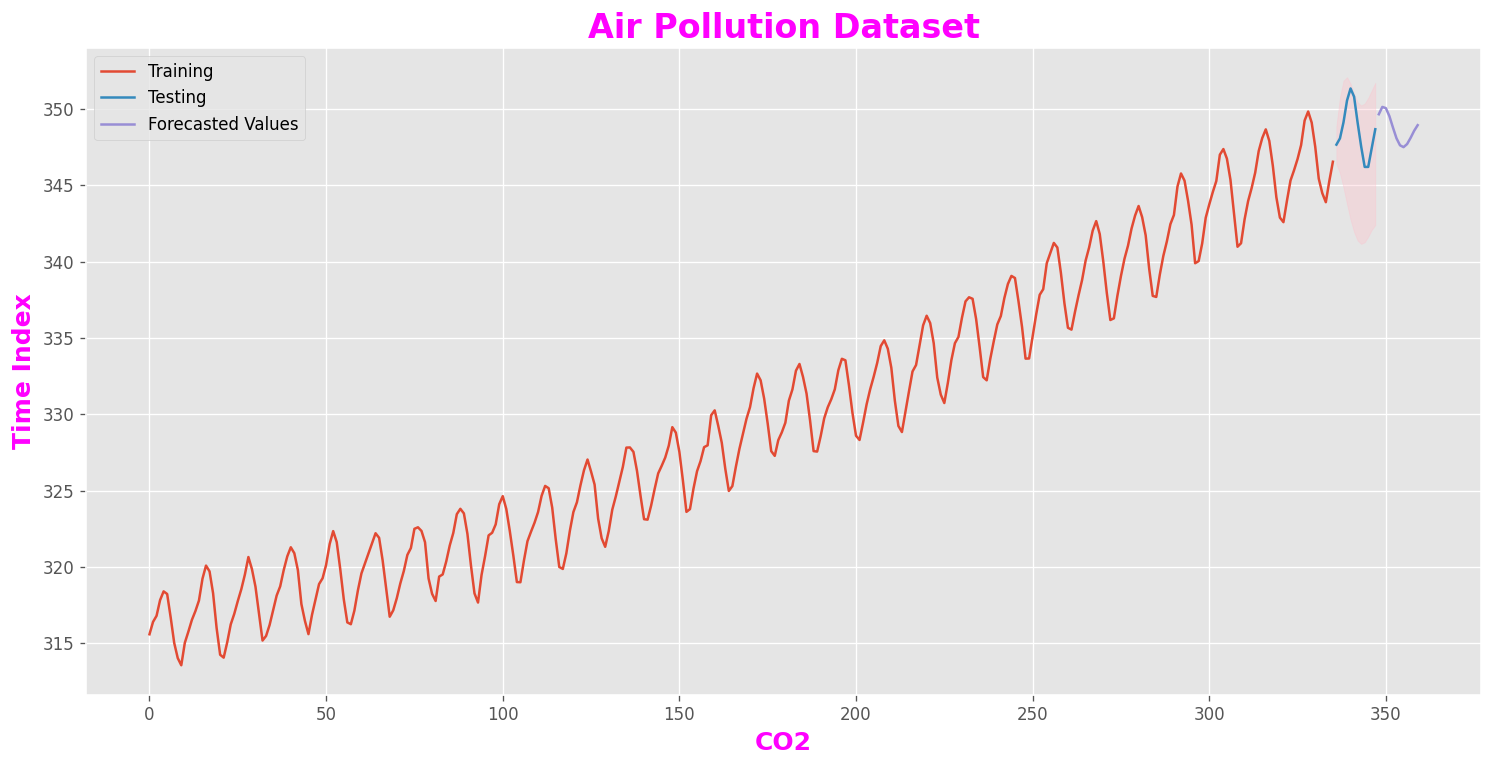

In [ ]:
# Plotting the Forecasted Values
plt.style.use('ggplot')
plt.figure(figsize=(15,7), dpi = 120)
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Testing')
plt.plot(forecast, label = 'Forecasted Values')
plt.xlabel('CO2', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':15})
plt.ylabel('Time Index', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':15})
plt.title('Air Pollution Dataset', color = 'magenta', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':20})
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color = 'pink', alpha = 0.35)
plt.legend(loc = 'best')
plt.show()


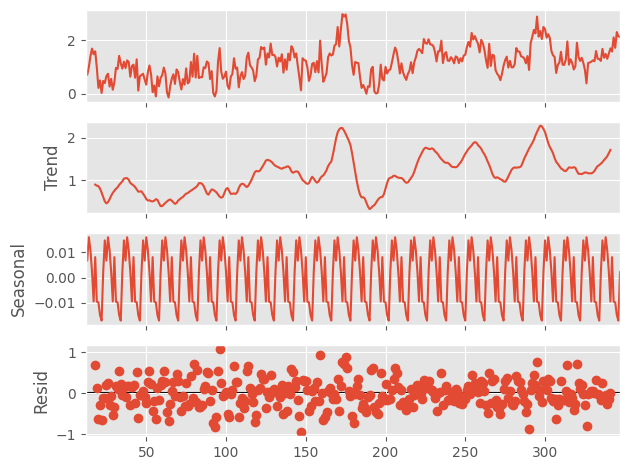

In [ ]:
# Let's understand the graey areas not properly dealt with by ARIMA
import statsmodels.api as sm
seasonal_diff = air.diff(12).dropna()
decompose = sm.tsa.seasonal_decompose(seasonal_diff, period =12)
decompose.plot()
plt.show()

In [ ]:
# ARIMA Modelling is usually not very good at managing seasonality, therefore, we need to add to it a seasonal part == Seasoanl ARIMA or SARIMA
"""
SARIMA will comme on the type SARIMA(p,d,q)X(P,D,Q,m)

"""
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air, order = (2,1,1), seasonal_order = (2,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  348
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -63.761
Date:                            Fri, 16 Jan 2026   AIC                            141.522
Time:                                    10:32:52   BIC                            168.221
Sample:                                         0   HQIC                           152.166
                                            - 348                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4509      0.125      3.622      0.000       0.207       0.695
ar.L2          0.1339      0.081   

In [ ]:
# Creating SARIMA number 2
model = SARIMAX(air, order = (1,1,1), seasonal_order = (1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -65.936
Date:                            Fri, 16 Jan 2026   AIC                            141.872
Time:                                    10:36:25   BIC                            160.943
Sample:                                         0   HQIC                           149.475
                                            - 348                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3482      0.121      2.866      0.004       0.110       0.586
ma.L1         -0.6661      0.099   